<a href="https://colab.research.google.com/github/terra2n/2025_KB_TI-1C/blob/main/jobsheet8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervise Learning Regression dan Classtification


## Latihan

### Decision Tree


In [68]:
import pandas as pd

iris = pd.read_csv('Iris.csv')

In [69]:
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
# menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)

In [66]:
# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']
# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [53]:
from sklearn.tree import DecisionTreeClassifier
# membuat model Decision Tree
tree_model = DecisionTreeClassifier()
# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

In [54]:
# Evaluasi Model
from sklearn.metrics import accuracy_score
y_pred = tree_model.predict(X_test)
acc_secore = round(accuracy_score(y_pred, y_test), 3)
print('Accuracy: ', acc_secore)

Accuracy:  0.933


In [55]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [56]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

#### PNG

##### dari dot ke png

In [208]:
!sudo apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [211]:
!dot -Tpng iris_tree.dot -o iris_tree.png

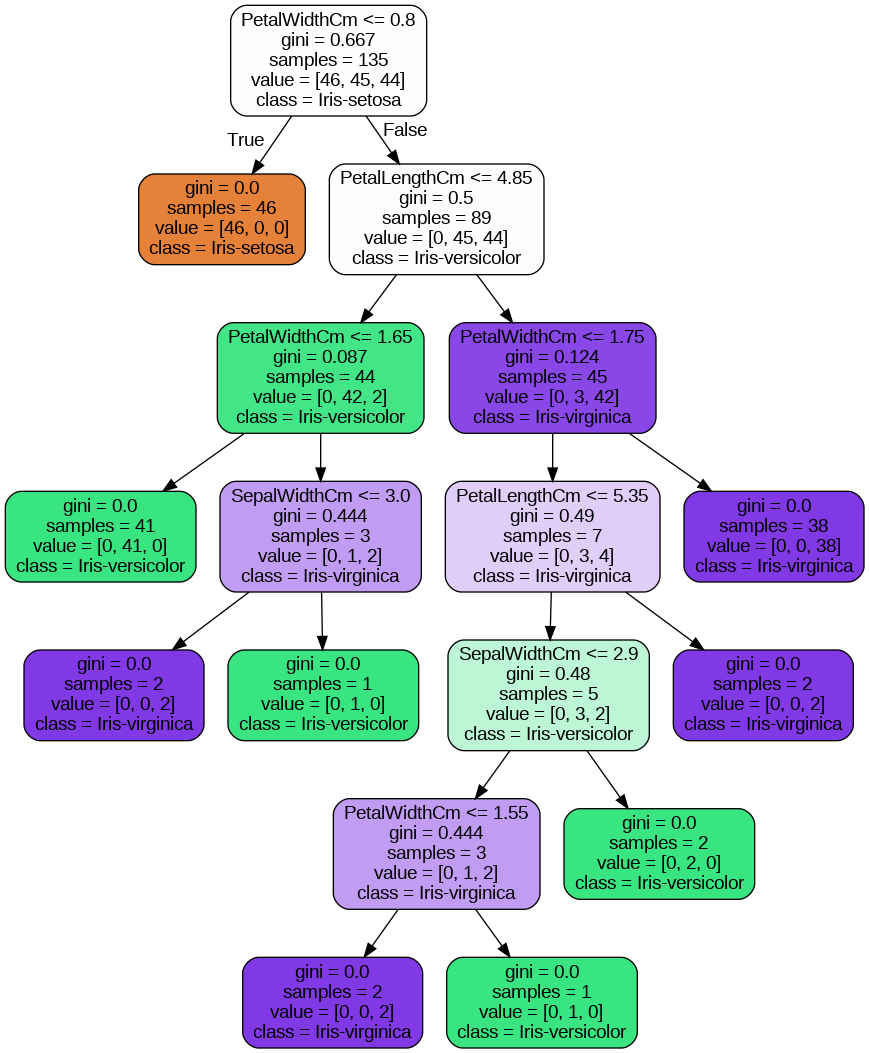

In [212]:
from IPython.display import Image
Image('iris_tree.png')

##### png langsung

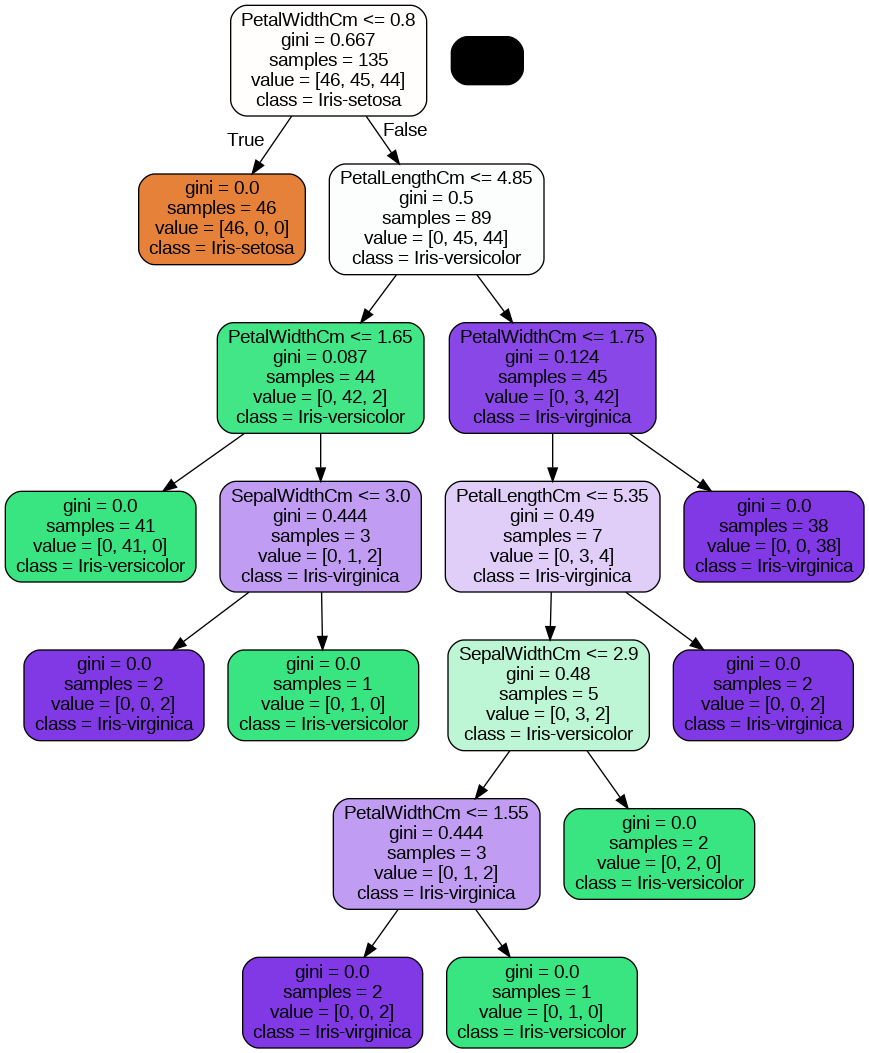

In [213]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(
    tree_model,
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    filled=True, rounded=True,
    out_file=None
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("iris_tree.png")  # Simpan sebagai PNG
Image(graph.create_png())         # Tampilkan di Jupyter Notebook


### Linear Regression

In [ ]:
import numpy as np
#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

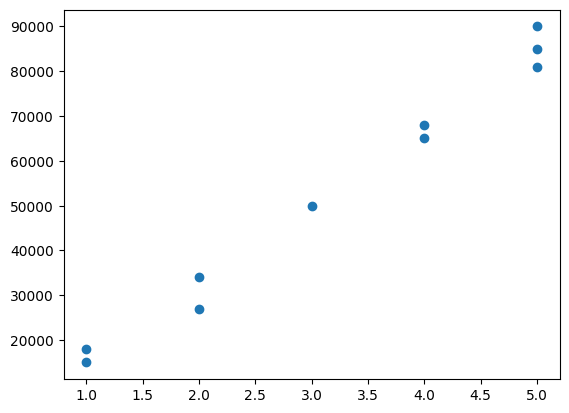

In [ ]:
# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms, house_price)

In [ ]:
from sklearn.linear_model import LinearRegression
# latih model dengan Linear Regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression()

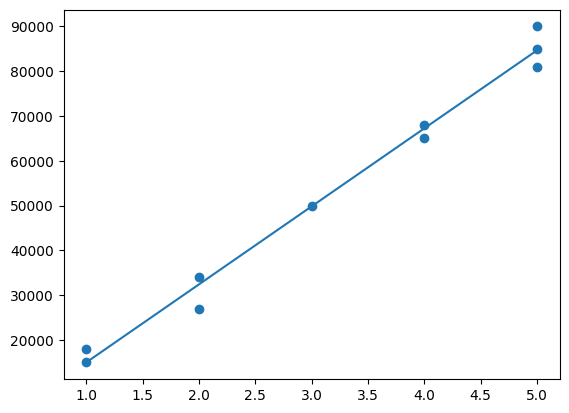

In [ ]:
# menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

In [ ]:
# Data testing
# Jumlah kamar yang ingin diprediksi harganya
X_test = np.array([[6], [7]])
# Melakukan prediksi harga kamar
y_pred = linreg.predict(X_test)
# Menampilkan hasil prediksi
for i in range(len(X_test)):
    print("Jumlah kamar:", X_test[i][0])
    print("Prediksi harga kamar:", y_pred[i])
    print()

Jumlah kamar: 6
Prediksi harga kamar: 102110.16949152542

Jumlah kamar: 7
Prediksi harga kamar: 119542.37288135593



In [ ]:
# uji akurasi model
linreg.score(X_test, y_pred)

1.0

### Logistic Regression


In [102]:
import pandas as pd
import io

# membaca dataset dan mengubahnya menjadi dataframe
with open('iklan_sosmed.csv', 'r') as f:
    data_string = f.read()

df = pd.read_csv(io.StringIO(data_string), delimiter=';')

In [103]:
df.head()

,ID,Jenis_Kelamin,Umur,Gaji,Transaksi
0,15624510,Pria,19,285000000,0
1,15810944,Pria,35,300000000,0
2,15668575,Wanita,26,645000000,0
3,15603246,Wanita,27,855000000,0
4,15804002,Pria,19,1140000000,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             400 non-null    int64 
 1   Jenis_Kelamin  400 non-null    object
 2   Umur           400 non-null    int64 
 3   Gaji           400 non-null    int64 
 4   Transaksi      400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [105]:
# drop kolom yang tidak diperlukan
data = df.drop(columns=['ID'])

# jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data

,Umur,Gaji,Transaksi,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita
0,19,285000000,0,True,False
1,35,300000000,0,True,False
2,26,645000000,0,False,True
3,27,855000000,0,False,True
4,19,1140000000,0,True,False
...,...,...,...,...,...
395,46,615000000,1,False,True
396,51,345000000,1,True,False
397,50,300000000,1,False,True
398,36,495000000,0,True,False


In [106]:
# pisahkan atribut dan label
predictions = ['Umur' , 'Gaji' , 'Jenis_Kelamin_Wanita' , 'Jenis_Kelamin_Pria']
X = data[predictions]
y = data['Transaksi']

In [107]:
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

,Umur,Gaji,Jenis_Kelamin_Wanita,Jenis_Kelamin_Pria
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [108]:
from sklearn.model_selection import train_test_split

# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

In [109]:
from sklearn import linear_model

# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [110]:
# uji akurasi model
model.score(X_test, y_test)

0.825

## Tugas Praktikum

### 1.

#### import library

In [164]:
# import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

####load dataset

In [165]:
# load dataset
# membaca dataset dan mengubahnya menjadi dataframe
with open('iklan_sosmed.csv', 'r') as f:
    data_string = f.read()

df = pd.read_csv(io.StringIO(data_string), delimiter=';')

#### menampilkan properti data

In [166]:
dataset.shape

(400, 5)

In [167]:
dataset.dtypes

,0
ID,int64
Jenis_Kelamin,object
Umur,int64
Gaji,int64
Transaksi,int64


#### cek missing value dan duplikasi data

In [168]:
dataset.isnull().sum()

,0
ID,0
Jenis_Kelamin,0
Umur,0
Gaji,0
Transaksi,0


In [169]:
dataset.duplicated().sum()

np.int64(0)

#### cek korelasi dengan kolom transaksi

In [204]:
# Lakukan one-hot encoding pada kolom 'Jenis_Kelamin'
dataset_encoded = pd.get_dummies(dataset, columns=['Jenis_Kelamin'], drop_first=True)

# Cek korelasi dengan kolom 'Transaksi' setelah encoding
print(dataset_encoded.corr()['Transaksi'])

ID                      0.007120
Umur                    0.622454
Gaji                    0.362083
Transaksi               1.000000
Jenis_Kelamin_Wanita    0.042469
Name: Transaksi, dtype: float64


In [205]:
dataset_encoded.corr()['Transaksi']

,Transaksi
ID,0.007120
Umur,0.622454
Gaji,0.362083
Transaksi,1.000000
Jenis_Kelamin_Wanita,0.042469


In [186]:
# Memilih Umur & Gaji Sebagai Data Fitur dan Transaksi sebagai Data Label
X = dataset.iloc[:,2:-1]
y = dataset.iloc[:, -1]

#### train test split

In [187]:
# Membagi dataset menjadi 80% Data Training dan 20% Data Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [188]:
# ubah dari dataframe / series pandas menjadi np.array
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [189]:
# Normalisasi dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### buat klasifier dan lakukan training

##### decisiontree classifier

In [190]:
# Buat Klasifier dengan DecisionTree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [191]:
# Melatih model dengan menggunakan data latih
classifier = classifier.fit(X_train, y_train)

In [192]:
# Melakukan prediksi pada X_test
y_pred = classifier.predict(X_test)

In [193]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [194]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [195]:
# buat confussion matrix & skor akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

Akurasi : 82.5%
Confussion Matrix : 
[[49  7]
 [ 7 17]]


###### Melakukan visualisai data train dan data test

<ipython-input-196-e218580cc089>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


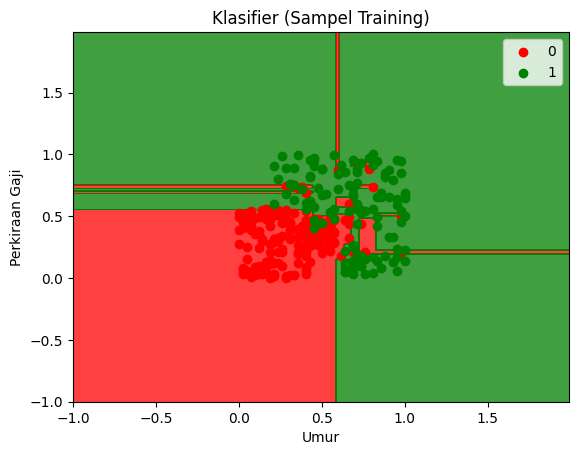

In [196]:
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

##### logistic regression

In [198]:
# Buat Klasifier dengan LinearRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [199]:
# Melatih model dengan menggunakan data latih
classifier = classifier.fit(X_train, y_train)

In [200]:
# Melakukan prediksi pada X_test
y_pred = classifier.predict(X_test)

In [201]:
# buat confussion matrix & skor akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

Akurasi : 85.0%
Confussion Matrix : 
[[54  2]
 [10 14]]


###### melakukan visualisai data train dan data test

<ipython-input-203-af4c1ccef277>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


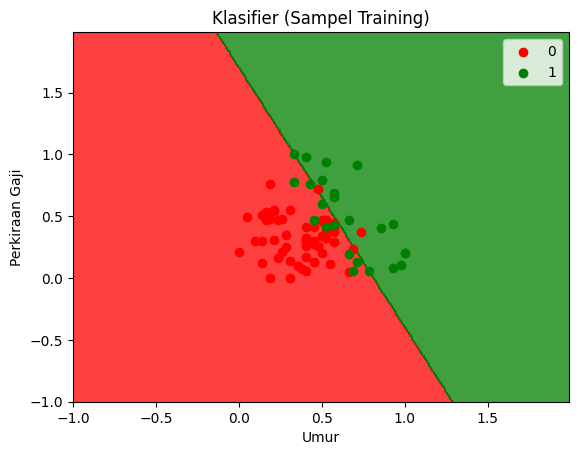

In [203]:
# visualisasi sampel data tes
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

#### PNG

##### dot ke png

In [228]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import Image, display

# Buat file .dot
export_graphviz(
    tree_model, # Mengganti decision_tree_classifier_model dengan tree_model
    out_file="decision_tree.dot",
    feature_names=['Umur', 'Perkiraan Gaji'],
    class_names=['Tidak Transaksi', 'Transaksi'],
    rounded=True,
    filled=True
)

In [225]:
!dot -Tpng decision_tree.dot -o decision_tree.png

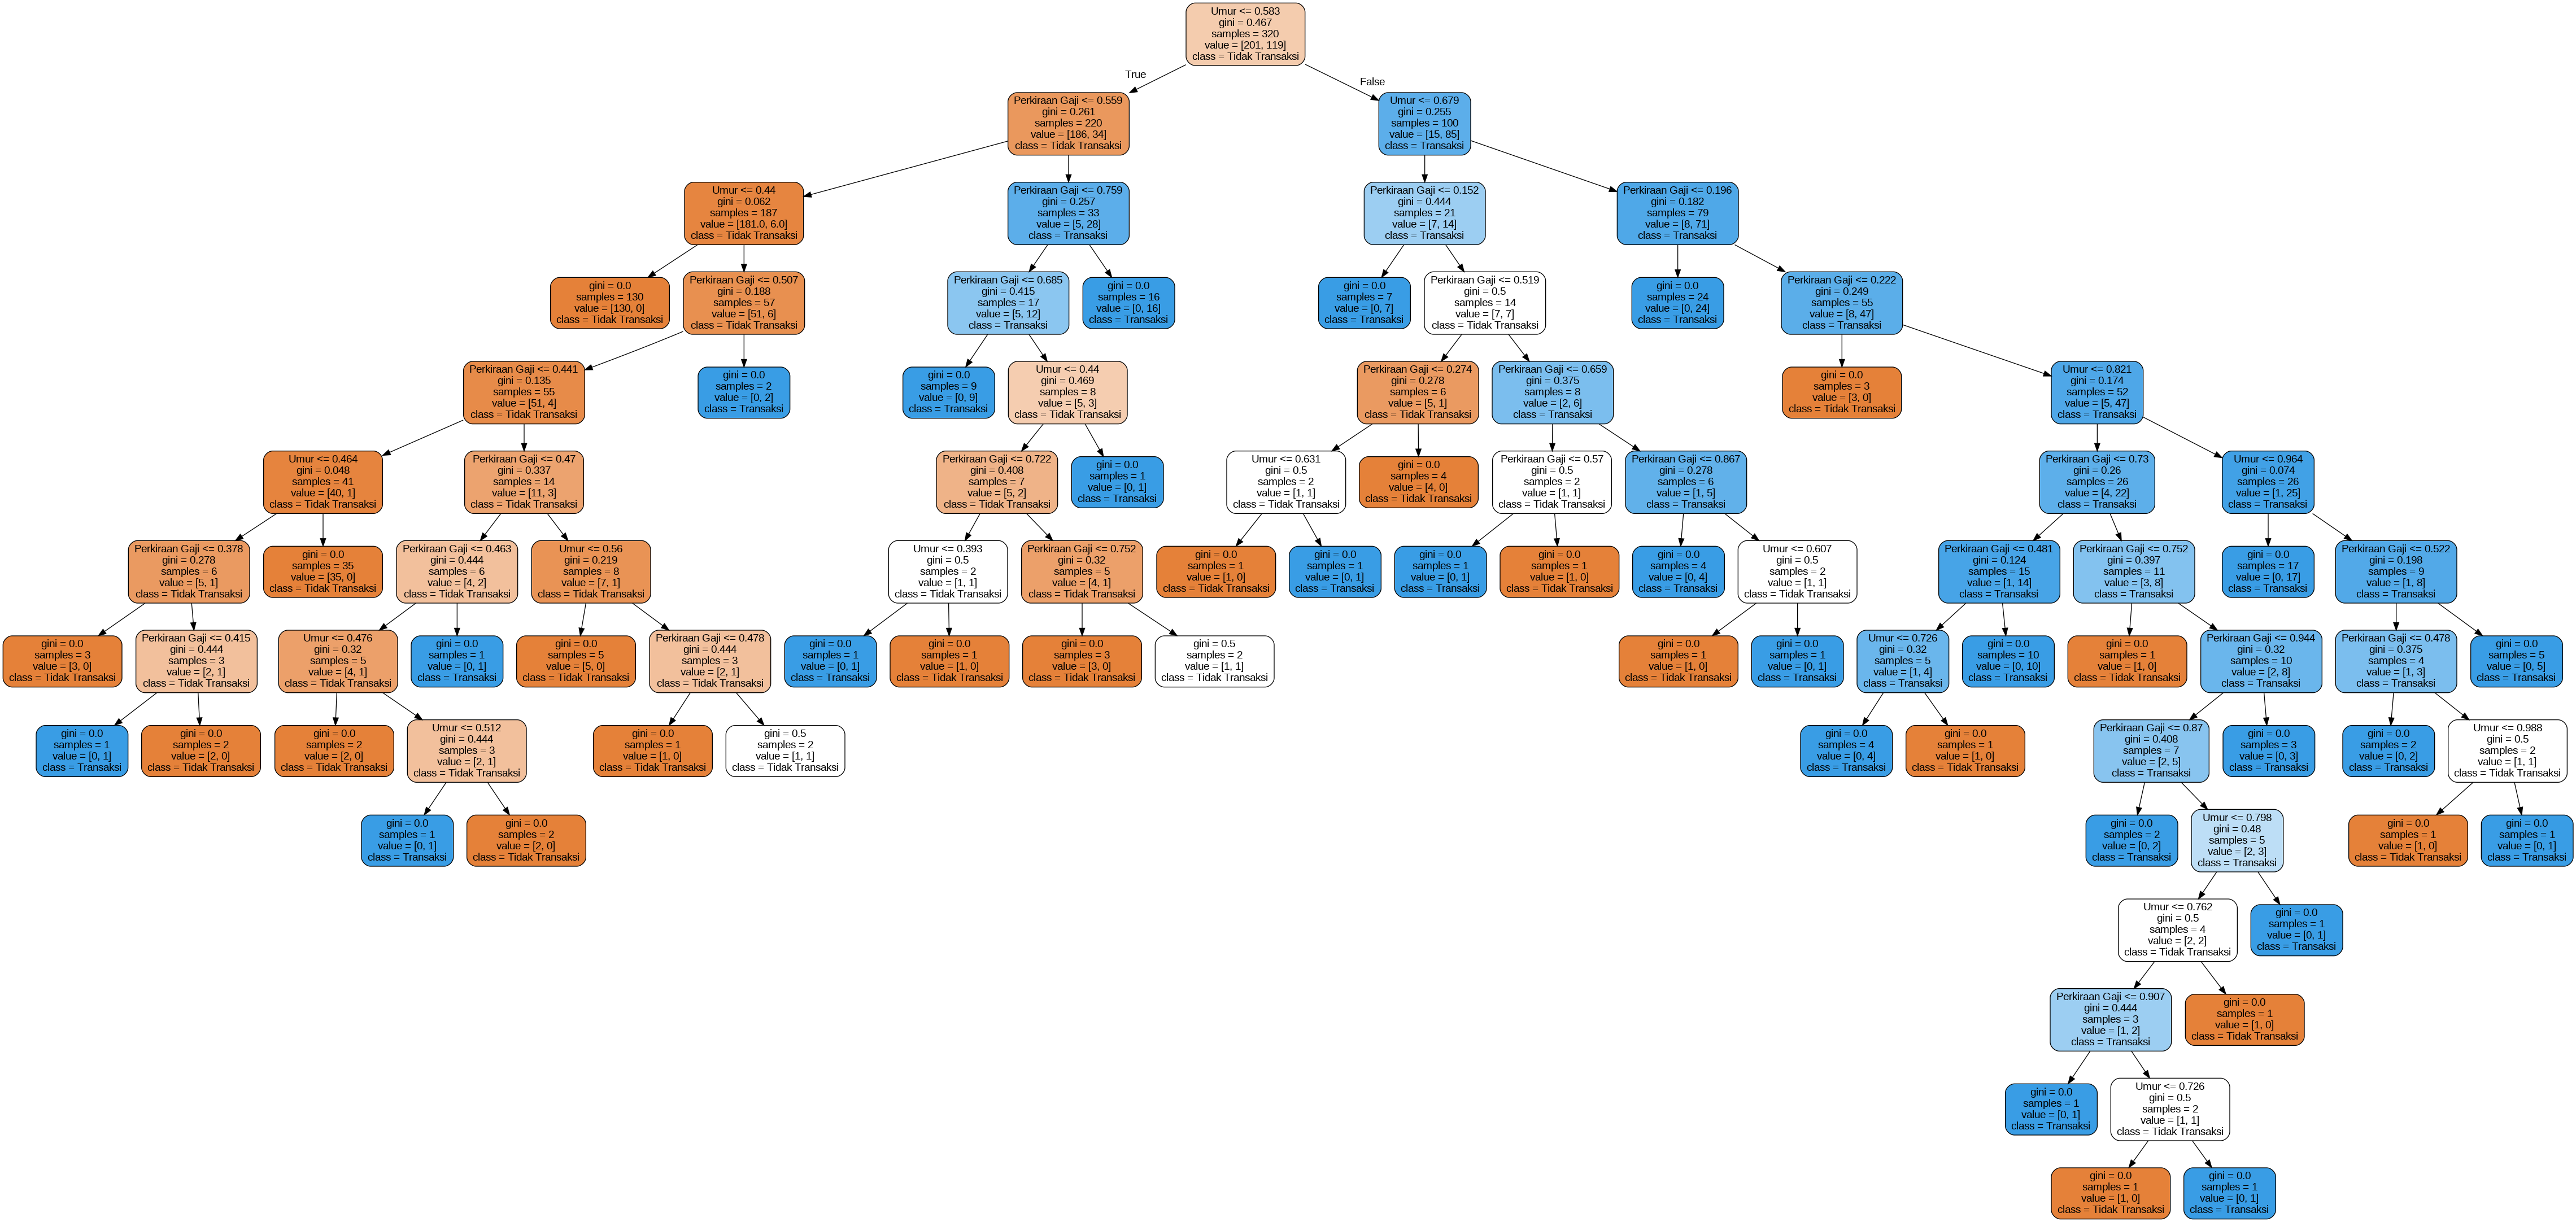

In [227]:
from IPython.display import Image
Image('decision_tree.png')

In [220]:
from sklearn.tree import export_graphviz
from graphviz import Source

# Ekspor model ke format .dot
export_graphviz(classifier, out_file="tree.dot",
                feature_names=['Umur', 'Gaji'],
                class_names=['Tidak Transaksi', 'Transaksi'],
                rounded=True, filled=True)

# Baca file .dot dan render menjadi .png
s = Source.from_file("tree.dot")
s.render("tree", format="png", cleanup=True)  # akan buat 'tree.png'


AttributeError: 'LogisticRegression' object has no attribute 'tree_'

##### langsung png

In [218]:
from sklearn.tree import DecisionTreeClassifier

# Latih model Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

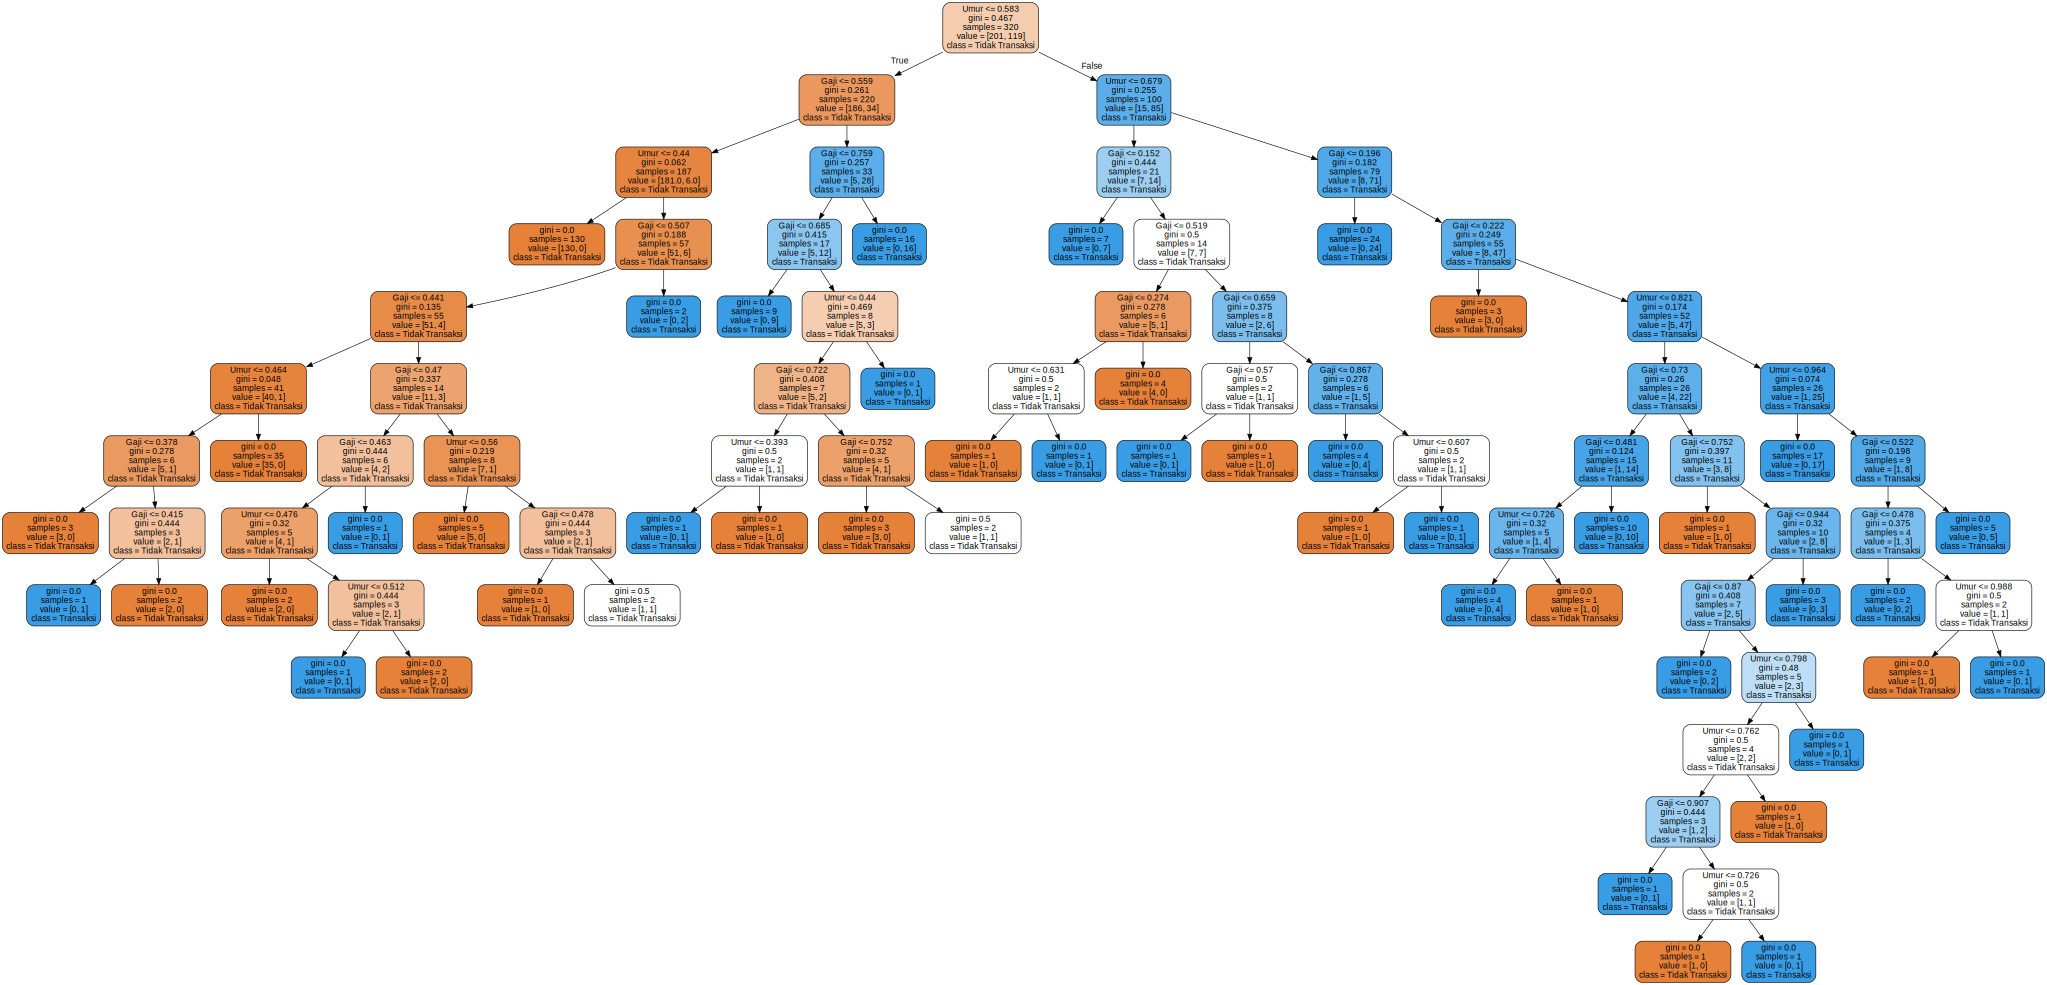

In [221]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import display

# Export ke string .dot
dot_data = export_graphviz(
    tree_model,
    out_file=None,
    feature_names=['Umur', 'Gaji'],  # Ganti sesuai fitur yang kamu pakai
    class_names=['Tidak Transaksi', 'Transaksi'],
    rounded=True,
    filled=True
)

# Render di Jupyter Notebook
graph = Source(dot_data)
display(graph)

In [215]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Gambar dan simpan sebagai PNG
plt.figure(figsize=(12,8))
plot_tree(classifier,
          feature_names=['Umur', 'Gaji'],
          class_names=['Tidak Transaksi', 'Transaksi'],
          filled=True, rounded=True)
plt.savefig("tree_direct.png")  # langsung simpan sebagai PNG
plt.close()


InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got LogisticRegression() instead.

<Figure size 1200x800 with 0 Axes>

### 2.

#### import library

#### load dataset

#### menampilkan properti data

#### cek missing value dan duplikasi data

#### memisahkan datafitur dan data label

#### train test split

#### buat klasifier dan lakukan training

##### linear regression

###### melakukan visualisasi data train dan data test

###3.

###4.